In [1]:
from plasticnet import *

Splikes version  0.1.0
Plasticnet version  0.1.0


In [3]:
ls hdf5/*

hdf5/bbsk081604_dog.hdf5


## Initial BCM simulation

* natural images (positive and negative)
* neurons with all-positive outputs
* connections can be both positive and negative


('Time Elapsed...', '2.40 s')


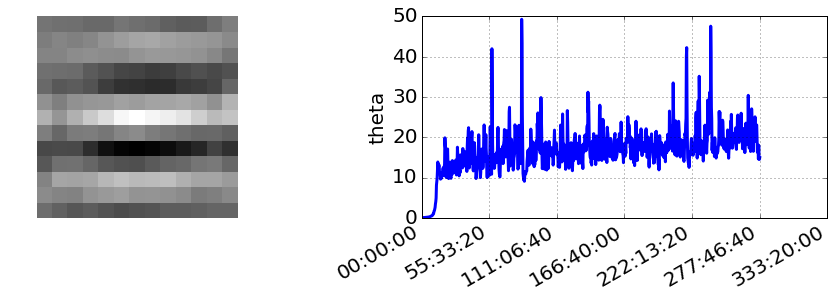

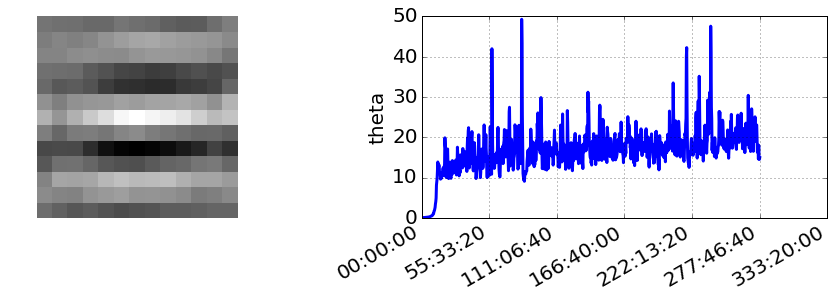

In [5]:
pre=neurons.natural_images('hdf5/bbsk081604_dog.hdf5',rf_size=13,verbose=False)
post=neurons.linear_neuron(1)
post+=neurons.process.min_max(0,500)

c=connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

run_sim(sim,[pre,post],[c],display_hash=False)

utils.plot_rfs_and_theta(sim,[pre,post],[c])

### Things to try:

1. try running several times - do the weights and theta look the same?  another way to run several times is to run several neurons.  changing:

> post=neurons.linear_neuron(1)

to 

> post=neurons.linear_neuron(5)

runs 5 neurons at a time.

### More things to try 
2. try changing the learning rate, eta.  What happens when it is too big or too small?
3. try changing the rf_size - what else changes (occasionally you may need to decrease eta as you increase rf_size

## Hebbian simulation

* natural images (positive and negative)
* neurons with pos/neg outputs
* connections can be both positive and negative - and are normalized


('Time Elapsed...', '3.16 s')


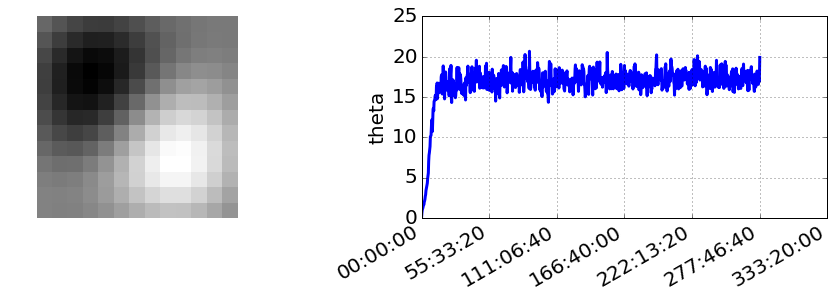

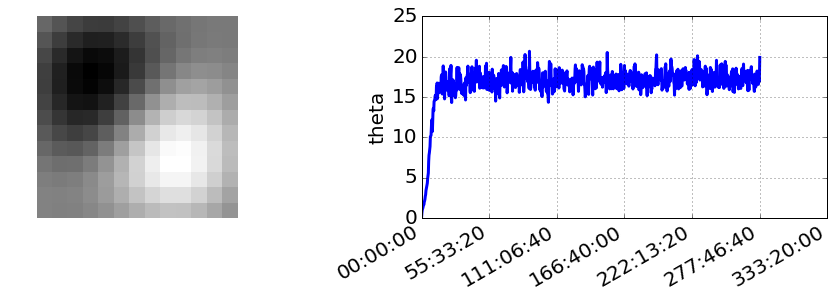

In [6]:
pre=neurons.natural_images('hdf5/bbsk081604_dog.hdf5',rf_size=13,verbose=False)
post=neurons.linear_neuron(1)

c=connections.Hebb(pre,post,[-.05,.05])
c+=connections.process.normalization()

c.eta=5e-6
c.tau=1000

sim=simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

run_sim(sim,[pre,post],[c],display_hash=False)

utils.plot_rfs_and_theta(sim,[pre,post],[c])

### Things to try:

1. try running several times - do the weights and theta look the same as BCM?
2. try changing the learning rate, eta.  What happens when it is too big or too small?
3. try changing the rf_size - what else changes (occasionally you may need to decrease eta as you increase rf_size
4. what happens if you take out the normalization?